2024-11-08 12:49:08.839473: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-08 12:49:09.494315: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-08 12:49:11.803421: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-08 12:49:11.804628: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. 

Epoch 1/60
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 161ms/step - accuracy: 0.7041 - loss: 1.1405 - val_accuracy: 0.7978 - val_loss: 0.5731
Epoch 2/60
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 151ms/step - accuracy: 0.8144 - loss: 0.5555 - val_accuracy: 0.7978 - val_loss: 0.5220
Epoch 3/60
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 153ms/step - accuracy: 0.8198 - loss: 0.5015 - val_accuracy: 0.8127 - val_loss: 0.4961
Epoch 4/60
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 151ms/step - accuracy: 0.8095 - loss: 0.4903 - val_accuracy: 0.7640 - val_loss: 0.5296
Epoch 5/60
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 151ms/step - accuracy: 0.7722 - loss: 0.5232 - val_accuracy: 0.7903 - val_loss: 0.5184
Epoch 6/60
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 151ms/step - accuracy: 0.8047 - loss: 0.4917 - val_accuracy: 0.8127 - val_loss: 0.4940
Epoch 7/60
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - accuracy: 0.8442 - loss: 0.4428 - val_accuracy: 0.8090 - val_loss: 0.4805
Epoch 8/60
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 153ms/step - accuracy: 0.8247 - loss: 0.4500 - val_accu

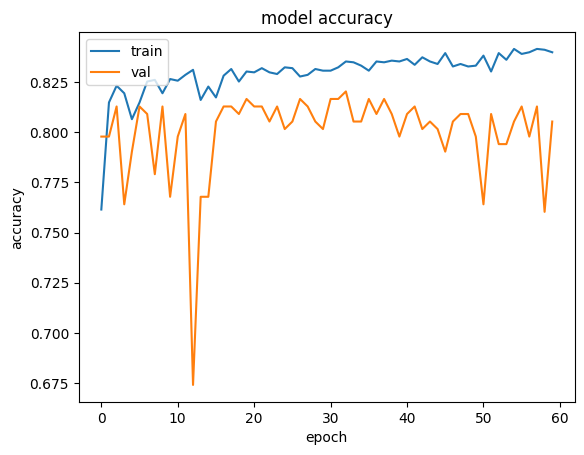

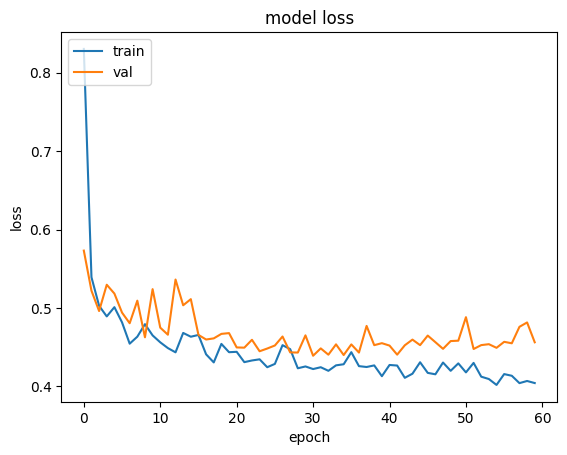

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


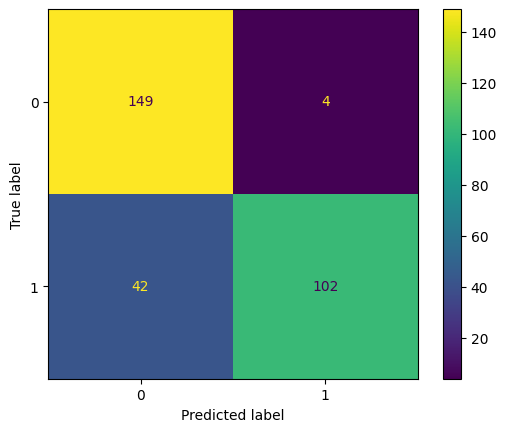

              precision    recall  f1-score   support

           0       0.78      0.97      0.87       153
           1       0.96      0.71      0.82       144

    accuracy                           0.85       297
   macro avg       0.87      0.84      0.84       297
weighted avg       0.87      0.85      0.84       297



In [1]:
import os
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras import Sequential
from keras.utils import load_img,img_to_array
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report



data_dir = '/data/knoblach/Audio_Classification/test/train'
test_data_dir = '/data/knoblach/Audio_Classification/test/val'
classes = ['normal', 'abnormal']

# Load and preprocess audio data
def load_and_preprocess_data(data_dir, classes, target_shape=(128, 128)):
    data = []
    labels = []

    for i, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir, filename)
                audio_data, sample_rate = librosa.load(file_path, sr=None)
                # Perform preprocessing
                mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
                mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)
                data.append(mel_spectrogram)
                labels.append(i)

    return np.array(data), np.array(labels)

# Split data into training and testing(validation set) sets
data, labels = load_and_preprocess_data(data_dir, classes)
labels = to_categorical(labels, num_classes=len(classes))  # Convert labels to one-hot encoding
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=42)

# make data ready for final testing in confusion matrix (real test set)
test_data,test_labels = load_and_preprocess_data(test_data_dir, classes)
test_labels = to_categorical(test_labels, num_classes=len(classes))

# Test

model = Sequential()

#     # 1st conv layer
# input_shape = X_train[0].shape
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
# model.add(MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
# model.add(BatchNormalization())

#     # 2nd conv layer
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
# model.add(BatchNormalization())

#     # 3rd conv layer
# model.add(Conv2D(32, (2, 2), activation='relu'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
# model.add(BatchNormalization())

#     # flatten output and feed it into dense layer
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.3))

#     # output layer
# model.add(Dense(10, activation='softmax'))

# Create CNN
input_shape = X_train[0].shape
input_layer = Input(shape=input_shape)
x = Conv2D(32, (3, 3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(64, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu')(x)
output_layer = Dense(len(classes), activation='softmax')(x)
model = Model(input_layer, output_layer)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

# def recall_m(y_true, y_pred):
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
#     recall = true_positives / (possible_positives + K.epsilon())
#     return recall

# def precision_m(y_true, y_pred):
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
#     precision = true_positives / (predicted_positives + K.epsilon())
#     return precision

# def f1_m(y_true, y_pred):
#     precision = precision_m(y_true, y_pred)
#     recall = recall_m(y_true, y_pred)
#     return 2*((precision*recall)/(precision+recall+K.epsilon()))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f'Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

model.save('audio_model_2.h5')

#y_pred = model.predict(X_test, batch_size=64, verbose=1)
test_pred = model.predict(test_data, batch_size=64, verbose=1)
test_pred_bool = np.argmax(test_pred, axis=1)
test_labels_bool = np.argmax(test_labels, axis=1)
# ypred=np.array(y_pred)
#ytrue=np.array(labels)

cm = confusion_matrix(test_labels_bool, test_pred_bool)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# Then just plot it:
disp.plot()
# And show it:
plt.show()


print(classification_report(test_labels_bool, test_pred_bool))


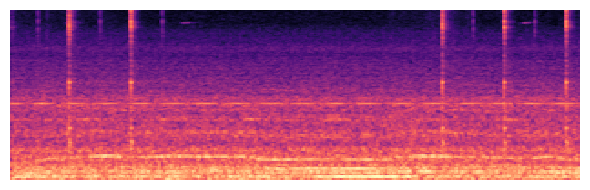

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Class: normal, Probability: 0.0011
Class: abnormal, Probability: 0.9989
The audio is classified as: abnormal
Accuracy: 0.9989


In [12]:
from tensorflow.keras.models import load_model
import librosa
from tensorflow.image import resize
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the saved model
model = load_model(r"C:\MyUserContents\Uni Bamberg Dars\KMU\kmu-ki-ez\Explainable_Audio_Classifier\audio_model_2.h5")

# Define the target shape for input spectrograms
target_shape = (128, 128)

# Define your class labels
classes = ['normal','abnormal']

# Function to preprocess and classify an audio file
def test_audio(file_path, model):
    # Load and preprocess the audio file
    audio_data, sample_rate = librosa.load(file_path, sr=None)
    mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
    mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)
    mel_spectrogram = tf.reshape(mel_spectrogram, (1,) + target_shape + (1,))

    # plotting the spectogram    
    S = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)  
    plt.figure(figsize=(6, 2)) # change it for the size
    plt.axis('off') # comment out for turning the axis on
    librosa.display.specshow(librosa.power_to_db(S),sr=sample_rate, x_axis='time', y_axis='mel')
    # plt.colorbar(format='%+2.0f dB') # for showing the db colorbar
    plt.tight_layout()
    plt.show()
    # 
    # Make predictions
    predictions = model.predict(mel_spectrogram)

    # Get the class probabilities
    class_probabilities = predictions[0]

    # Get the predicted class index
    predicted_class_index = np.argmax(class_probabilities)

    return class_probabilities, predicted_class_index

# Test an audio file
test_audio_file = r'C:\Users\karam\Valve_audio_data\abnormal\\1000_abnormal.wav'
class_probabilities, predicted_class_index = test_audio(test_audio_file, model)

# Display results for all classes
for i, class_label in enumerate(classes):
    probability = class_probabilities[i]
    print(f'Class: {class_label}, Probability: {probability:.4f}')

# Calculate and display the predicted class and accuracy
predicted_class = classes[predicted_class_index]
accuracy = class_probabilities[predicted_class_index]
print(f'The audio is classified as: {predicted_class}')
print(f'Accuracy: {accuracy:.4f}')

In [ ]:
import librosa
import numpy
import skimage.io

def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

def spectrogram_image(y, sr, out, hop_length, n_mels):
    # use log-melspectrogram
    mels = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels,
                                            n_fft=hop_length*2, hop_length=hop_length)
    mels = numpy.log(mels + 1e-9) # add small number to avoid log(0)

    # min-max scale to fit inside 8-bit range
    img = scale_minmax(mels, 0, 255).astype(numpy.uint8)
    img = numpy.flip(img, axis=0) # put low frequencies at the bottom in image
    img = 255-img # invert. make black==more energy

    # save as PNG
    skimage.io.imsave(out, img)


if __name__ == '__main__':
    # settings
    hop_length = 512 # number of samples per time-step in spectrogram
    n_mels = 128 # number of bins in spectrogram. Height of image
    time_steps = 384 # number of time-steps. Width of image

    # load audio. Using example from librosa
    y, sr = librosa.load('/data/knoblach/Audio_Classification/test/val/abnormal/1_abnormal.wav', sr=None)
    out = 'out.png'

    # extract a fixed length window
    start_sample = 0 # starting at beginning
    length_samples = time_steps*hop_length
    window = y[start_sample:start_sample+length_samples]
    
    # convert to PNG
    spectrogram_image(window, sr=sr, out=out, hop_length=hop_length, n_mels=n_mels)
    print('wrote file', out)

wrote file out.png


In [16]:
import tensorflow as tf
from sklearn.metrics.pairwise import cosine_similarity
import os
import numpy as np
from keras.utils import img_to_array
import librosa
from tensorflow.image import resize

class NearMissImageFinder:

    def __init__(self, model_path, test_image):
        """
        Initialize the NearMissImageFinder class
        Args:
            model_path (str): Path to the pre-trained model.
            test_image (str): Path to the test image for analysis.
        """
        self.model = tf.keras.models.load_model(model_path)
        self.data_folder = test_image
        self.feature_extraction_model = tf.keras.Model(inputs=self.model.input, outputs=self.model.layers[-3].output)
        self.image_paths = []
        self.labels = []
 
    def preprocess_image(self, audio_path):
        """
        Preprocess image for prediction and feature extraction.

        Args:
            audio_path (str): Path of image to preprocess.

        Returns:
            predicted_class (str): The predicted class for the image.
            test_feature_vector (numpy.ndarray): Feature vector extracted from the image.
            img (numpy.ndarray): Preprocessed image data.
            class_probabilities (numpy.ndarray): Class probabilities for the image.
        """

        target_shape = (128, 128)
        audio_data, sample_rate = librosa.load(audio_path, sr=None)
        mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
        mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)
        mel_spectrogram = tf.reshape(mel_spectrogram, (1,) + target_shape + (1,))
        # img = np.expand_dims(mel_spectrogram.numpy(), axis=0)

        # Extract the feature vector for the provided image
        test_feature_vector = self.feature_extraction_model(mel_spectrogram)
        # test feature vector if it's null
        # print("test")
        # # print(test_feature_vector[0].shape[0])
        # for i in range(test_feature_vector[0].shape[0]):
        #     if test_feature_vector[0][i].numpy() != 0:
        #         print(i)
        #         print(test_feature_vector[0][i])
        print(self.feature_extraction_model.summary())
        # Predict the class probability for the provided image
        class_probabilities = self.model.predict(mel_spectrogram)
        print("calss Probibilities:")
        print(class_probabilities)
        predicted_probability = class_probabilities[0][0] 
        predicted_class = 'abnormal' if predicted_probability >= 0.5 else 'normal'
        print(test_feature_vector)

        return predicted_class, test_feature_vector, mel_spectrogram, class_probabilities


    def load_and_preprocess_training_data(self,train_folder, opposite_class):
        """
        Load and preprocess training data.

        Args:
            train_folder (str): Path to the training dataset.
            opposite_class (str): The opposite train class to the predicted test class.

        Returns:
            train_data (dict): dictionary containing image paths, labels, and feature vectors.
        """
        train_data = {'audio_paths': [], 'labels': [], 'feature_vectors': []}


        for root, dirs, files in os.walk(train_folder):
            label = "abnormal" if "abnormal" in root.lower() else "normal"
            if label == opposite_class:
                for file in files:
                    if file.endswith(".wav"):
                        audio_path = os.path.join(root, file)

                        target_shape = (128, 128)
                        audio_data, sample_rate = librosa.load(audio_path, sr=None)
                        mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
                        mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)
                        mel_spectrogram = tf.reshape(mel_spectrogram, (1,) + target_shape + (1,))
                        # Extract the feature vector for the provided image
                        feature_vector = self.feature_extraction_model(mel_spectrogram)

                        train_data['audio_paths'].append(audio_path)
                        train_data['labels'].append(label)
                        train_data['feature_vectors'].append(feature_vector)

        return train_data


def calc_cosine_similarities(test_feature_vector,train_data):
    cosine_similarities = {}
    for audio_path, image_data in zip(train_data['audio_paths'],train_data['feature_vectors']):

            cosine_sim = cosine_similarity(test_feature_vector, image_data)
            print(cosine_sim)


            cosine_similarities[audio_path] = cosine_sim[0][0]
            
    return cosine_similarities


In [17]:
ns_Img_finder = NearMissImageFinder("/home/karampour/kmu-ki-ez/Explainable_Audio_Classifier/audio_model_2.h5","/home/karampour/kmu-ki-ez/Explainable_Audio_Classifier/out.png")
predicted_test_class, test_feature_vector, preprocessed_image, class_probabilities = ns_Img_finder.preprocess_image('/data/knoblach/Audio_Classification/test/val/abnormal/1_abnormal.wav')
# Determine the opposite class based on the predicted test class
opposite_class = "abnormal" if predicted_test_class == "normal" else "normal"
train_data = ns_Img_finder.load_and_preprocess_training_data('/data/knoblach/Audio_Classification/test/train',opposite_class)
# calculate cosine similarities
cosine_similarities = calc_cosine_similarities(test_feature_vector, train_data)

print('cosine_similarities: ')
print(cosine_similarities)
# Sort the training images by cosine similarity in descending order
sorted_images = sorted(cosine_similarities.items(), key=lambda x: x[1],reverse=True)
# Display the top 5 "near miss" images and their similarity scores
top_k = 5
top_images = sorted_images[:top_k]
print('5 top near misses: ')
print(top_images)


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,816 (73.50 KB)

 Trainable params: 18,816 (73.50 KB)

 Non-trainable params: 0 (0.00 B)

None


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
calss Probibilities:
[[0.686783   0.31321695]]
tf.Tensor([[0. 0. 0. ... 0. 0. 0.]], shape=(1, 57600), dtype=float32)
[[0.96662956]]
[[0.6978675]]
[[0.9784294]]
[[0.6782054]]
[[0.5551015]]
[[0.8948047]]
[[0.587457]]
[[0.96761876]]
[[0.91097015]]
[[0.7025491]]
[[0.4151192]]
[[0.97574455]]
[[0.4806131]]
[[0.9750287]]
[[0.650335]]
[[0.40346882]]
[[0.49580088]]
[[0.52343386]]
[[0.46888587]]
[[0.95751065]]
[[0.7209185]]
[[0.27912354]]
[[0.45535946]]
[[0.6186753]]
[[0.9086192]]
[[0.80075306]]
[[0.9720885]]
[[0.93348986]]
[[0.9220248]]
[[0.7116089]]
[[0.96211463]]
[[0.68702084]]
[[0.48080128]]
[[0.95054436]]
[[0.925275]]
[[0.666999]]
[[0.44755733]]
[[0.7149846]]
[[0.97327626]]
[[0.93852437]]
[[0.8743199]]
[[0.97398746]]
[[0.33530742]]
[[0.92155606]]
[[0.91271967]]
[[0.9201206]]
[[0.8508818]]
[[0.67724514]]
[[0.6563772]]
[[0.90445155]]
[[0.57287776]]
[[0.50726086]]
[[0.486275]]
[[0.87418026]]
[[0.9751198]]
[[0.74073595]]
[[0.9615609]]
[[0.96524256]]
[[0.949

In [12]:
import librosa
import numpy as np
import skimage.io
import os
import cv2
from tensorflow.image import resize

target_shape = (128, 128)
                                  
y, sr = librosa.load('/data/knoblach/Audio_Classification/test/val/abnormal/1_abnormal.wav', sr=None)
out = 'out_2.png'


mels = librosa.feature.melspectrogram(y=y, sr=sr)
mel_spectrogram = resize(np.expand_dims(mels, axis=-1), target_shape)
#skimage.io.imsave(out, mel_spectrogram)
cv2.imwrite(out, mel_spectrogram.numpy(), [int(cv2.IMWRITE_JPEG_QUALITY), 100]+[int(cv2.IMWRITE_JPEG_OPTIMIZE), 1])

True

In [10]:
# Load and preprocess the image
from keras.utils import load_img

test_audio_file='/data/knoblach/Audio_Classification/test/val/abnormal/1_abnormal.wav'
test_image = load_img(test_audio_file, color_mode='rgb', target_size=(224, 224))
img_array = img_to_array(test_image)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

target_shape = (128, 128)

data = []
labels = []

for i, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir, filename)
                audio_data, sample_rate = librosa.load(file_path, sr=None)
                # Perform preprocessing (e.g., convert to Mel spectrogram and resize)
                mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
                mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)
                data.append(mel_spectrogram)
                labels.append(i)

audio_data, sample_rate = librosa.load(file_path, sr=None)
mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)
mel_spectrogram = tf.reshape(mel_spectrogram, (1,) + target_shape + (1,))

        # Make predictions
predictions = model.predict(mel_spectrogram)
predicted_class = 1 if predictions[0][0] > 0.5 else 0

class_probabilities, predicted_class_index = test_audio(test_audio_file, model)

# Display results for all classes
for i, class_label in enumerate(classes):
    probability = class_probabilities[i]
    print(f'Class: {class_label}, Probability: {probability:.4f}')

# Calculate and display the predicted class and accuracy
predicted_class = classes[predicted_class_index]
accuracy = class_probabilities[predicted_class_index]
print(f'The audio is classified as: {predicted_class}')
print(f'Accuracy: {accuracy:.4f}')

predictions = model.predict(test_generator)
y_pred = (predictions > 0.5).astype(int)
y_true = test_generator.classes

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f759011a9d0>